In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('./MBA Salary.csv')
data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [4]:
import statsmodels.api as sm
X  = sm.add_constant(data['Percentage in Grade 10'])
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [5]:
Y = data['Salary']

In [20]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(X,Y,train_size=.8,random_state=100)

In [21]:
data_lm = sm.OLS(train_y,train_X).fit()

In [22]:
print(data_lm.params)
data_lm.summary2()

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2024-06-05 23:31      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8088 176079.3801
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

<Figure size 800x600 with 0 Axes>

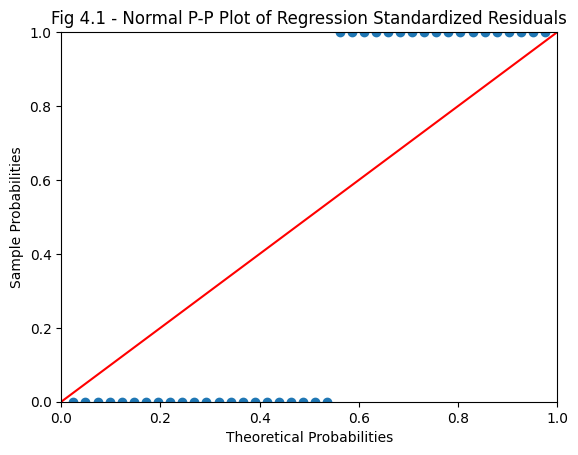

In [31]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


probplot = sm.ProbPlot(data_lm.resid)
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()